In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from pathlib import Path
from sys import platform


In [2]:
"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/pubmed_planetoid/round_0/score_accuracy/split_crange(200)_500_rest_0/xgbclass_10_2_0_5.csv"

'/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/pubmed_planetoid/round_0/score_accuracy/split_crange(200)_500_rest_0/xgbclass_10_2_0_5.csv'

In [3]:
def replace_slash(s):
    return s.replace("\\", "/")
    

In [4]:
prefix = r"\home\stamm\projects"
paths=[
    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\round_{round}\score_accuracy\split_crange(200)_500_rest_range(20)\xgbclass_10_2_0_10.csv"
    for dataset, round in product(["pubmed", "citeseer"], [0, 1])
] + [
    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\baselines\score_accuracy\split_crange(200)_500_rest_range(20)\{gnn_kind}_0_0.csv"
    for dataset, gnn_kind in product(["pubmed", "citeseer"], ["gat2017", "gcn2017"])
] +[
    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\round_{round}\score_accuracy\split_crange(201)_500_rest_range(20)\xgbclass_200_2_0_10.csv"
    for dataset, round in product(["pubmed"], [0,1])
] + [
    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\round_{round}\score_accuracy_train\split_crange(201)_500_rest_range(20)\xgbclass_200_2_0_10.csv"
    for dataset, round in product(["pubmed"], [0,1])
]+ [
    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\baselines\score_accuracy_train\split_crange(201)_500_rest_range(20)\{gnn_kind}_0_0.csv"
    for dataset, gnn_kind in product(["pubmed"], ["gat2017", "gcn2017"])
] +[
    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\round_{round}\score_accuracy\split_crange(201)_500_rest_range(10)\xgbclass_1000_2_0_100.csv"
    for dataset, round in product(["pubmed",  "citeseer"], [0,1])
] + [
        prefix.replace("\\", "/")+"/graph_description/snakemake_base/experiments/agg_train_per_class/pubmed_planetoid/round_1/score_accuracy/split_crange(201)_500_rest_range(5)/rulefit.csv"
    ] + [
        r"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/pubmed_planetoid/baselines/score_accuracy/split_crange(5,201)_500_rest_0/gcn2017_0_0_opti(0 100).csv",
        r"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/citeseer_planetoid/round_0/score_accuracy/split_crange(5,201)_500_rest_range(20)/xgbclass_opti(0,100).csv",
        r"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/citeseer_planetoid/baselines/score_accuracy/split_crange(201)_500_rest_range(20)/gat2017_0_0_opti(0,100).csv",
    ] + [
        f"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/{dataset}_planetoid/round_{round}/score_accuracy/split_crange(5,201)_500_rest_range(20)/xgbclass_opti(0,100).csv"
        for dataset,round in product(["citeseer", "cora", "pubmed"], [0,1,2])
    ]
#+ [
#  prefix+fr"\projects\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_None\round_{round}\score_accuracy\split_auto_0_rest_10\xgbclass_{n_class}_2_0.csv"
#    for dataset, round, n_class in product(["pubmed"], [0,1,2], [100])  
#    ] + [
#    prefix+fr"\projects\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_None\round_{round}\score_accuracy\split_auto_0_rest_10\xgbclass_{n_class}_2_0.csv"
#    for dataset, round, n_class in product(["citeseer"], [0,1], [100]) 
#]
if platform == "linux" or platform == "linux2":
    paths = [replace_slash(p) for p in paths]
paths = list(map(Path, paths))

In [5]:
print(paths)

[PosixPath('/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/pubmed_planetoid/round_0/score_accuracy/split_crange(200)_500_rest_range(20)/xgbclass_10_2_0_10.csv'), PosixPath('/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/pubmed_planetoid/round_1/score_accuracy/split_crange(200)_500_rest_range(20)/xgbclass_10_2_0_10.csv'), PosixPath('/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/citeseer_planetoid/round_0/score_accuracy/split_crange(200)_500_rest_range(20)/xgbclass_10_2_0_10.csv'), PosixPath('/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/citeseer_planetoid/round_1/score_accuracy/split_crange(200)_500_rest_range(20)/xgbclass_10_2_0_10.csv'), PosixPath('/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/pubmed_planetoid/baselines/score_accuracy/split_crange(200)_500_rest_range(20)/gat2017_0_0.csv'), 

In [6]:
dfs = [pd.read_csv(path) for path in paths]
df = pd.concat(dfs, axis=0)
df = df.reset_index(drop=True)

In [7]:
import re
split_seed_patter = re.compile(r"split_\d+_\d+_(?:rest|\d+)_(\d+)")
def split_seed_from_path(s):
    return split_seed_patter.search(s).group(1)

In [8]:
t = "snakemake_base/scores/citeseer_planetoid/baselines/score_accuracy/split_1_500_rest_7/gat2017_0_0_opti(0,100).txt"
split_seed_from_path(t)

'7'

In [9]:
df

,dataset,group,round,score_name,dyn_num_train_per_class,num_val,num_test,dyn_split_seed,joker,train_per_class,split_seed,path,value
0,pubmed,planetoid,round_0,accuracy,crange(200),500,rest,range(20),/xgbclass_10_2_0_10,1,0,snakemake_base/scores/pubmed_planetoid/round_0...,0.208286
1,pubmed,planetoid,round_0,accuracy,crange(200),500,rest,range(20),/xgbclass_10_2_0_10,1,1,snakemake_base/scores/pubmed_planetoid/round_0...,0.207869
2,pubmed,planetoid,round_0,accuracy,crange(200),500,rest,range(20),/xgbclass_10_2_0_10,1,2,snakemake_base/scores/pubmed_planetoid/round_0...,0.208338
3,pubmed,planetoid,round_0,accuracy,crange(200),500,rest,range(20),/xgbclass_10_2_0_10,1,3,snakemake_base/scores/pubmed_planetoid/round_0...,0.208338
4,pubmed,planetoid,round_0,accuracy,crange(200),500,rest,range(20),/xgbclass_10_2_0_10,1,4,snakemake_base/scores/pubmed_planetoid/round_0...,0.208025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13656,pubmed,planetoid,round_2,accuracy,"crange(5,201)",500,rest,range(20),"/xgbclass_opti(0,100)",200,15,snakemake_base/scores/pubmed_planetoid/round_2...,0.839931
13657,pubmed,planetoid,round_2,accuracy,"crange(5,201)",500,rest,range(20),"/xgbclass_opti(0,100)",200,16,snakemake_base/scores/pubmed_planetoid/round_2...,0.846914
13658,pubmed,planetoid,round_2,accuracy,"crange(5,201)",500,rest,range(20),"/xgbclass_opti(0,100)",200,17,snakemake_base/scores/pubmed_planetoid/round_2...,0.851641
13659,pubmed,planetoid,round_2,accuracy,"crange(5,201)",500,rest,range(20),"/xgbclass_opti(0,100)",200,18,snakemake_base/scores/pubmed_planetoid/round_2...,0.848150


In [10]:
df["split_seed"]=df["path"].map(split_seed_from_path)

In [11]:
#df["split_seed"].unique(), df["clf_seed"].unique(), df["n_estimators"].unique()

In [12]:
#df = pd.read_csv(path)
#df = df.drop(["group", "num_val", "num_test",  "clf_seed", "max_split_seed"],axis=1)

In [13]:
def extract_num_train_from_path(s):
    return int(s.split("split_")[1].split("/xgbclass")[0].split("_")[0])
def extract_split_id_from_path(s):
    return int(s.split("split_")[1].split("/xgbclass")[0].split("_")[3])

In [14]:
df["train_per_class"] = df["path"].map(extract_num_train_from_path)
df = df.drop(["path"],axis=1)
#df["round"] = 

In [15]:
df.dtypes

dataset                     object
group                       object
round                       object
score_name                  object
dyn_num_train_per_class     object
num_val                      int64
num_test                    object
dyn_split_seed              object
joker                       object
train_per_class              int64
split_seed                  object
value                      float64
dtype: object

In [16]:
#df[df["train_per_class"]==1]["path"][0].split("split_")[1].split("/xgbclass")[0].split("_")

In [17]:
#df[df["train_per_class"]==1]["path"][1].split("split_")[1].split("/xgbclass")[0].split("_")

In [18]:
import matplotlib.pyplot as plt

In [19]:
# remove seed 0, essential for runs with hyper parameter optimization!
df= df[df["split_seed"]!=0]

In [20]:
df_agg = df.drop(["split_seed", "group", "dyn_num_train_per_class", "num_test", "dyn_split_seed"],axis=1).groupby(["dataset", "round", "score_name", "joker", "train_per_class"]).agg(["mean", "std"]).reset_index()

In [21]:
df_agg

dataset      round score_name                  joker train_per_class  \
                                                                             
0    citeseer  baselines   accuracy           /gat2017_0_0               1   
1    citeseer  baselines   accuracy           /gat2017_0_0               2   
2    citeseer  baselines   accuracy           /gat2017_0_0               3   
3    citeseer  baselines   accuracy           /gat2017_0_0               4   
4    citeseer  baselines   accuracy           /gat2017_0_0               5   
..        ...        ...        ...                    ...             ...   
754    pubmed    round_2   accuracy  /xgbclass_opti(0,100)             100   
755    pubmed    round_2   accuracy  /xgbclass_opti(0,100)             125   
756    pubmed    round_2   accuracy  /xgbclass_opti(0,100)             150   
757    pubmed    round_2   accuracy  /xgbclass_opti(0,100)             175   
758    pubmed    round_2   accuracy  /xgbclass_opti(0,100)             200   

    num_val          value            
       mean  std      mean       std  
0     500.0  0.0  0.332063  0.094104  
1     500.0  0.0  0.446590  0.072205  
2     500.0  0.0  0.494144  0.049242  
3     500.0  0.0  0.525009  0.056137  
4     500.0  0.0  0.546729  0.048424  
..      ...  ...       ...       ...  
754   500.0  0.0  0.816149  0.009055  
755   500.0  0.0  0.822585  0.009171  
756   500.0  0.0  0.835933  0.009435  
757   500.0  0.0  0.827948  0.008058  
758   500.0  0.0  0.846466  0.005368  

[759 rows x 9 columns]

In [22]:
def my_dataset_iter(df, names):
    if len(names) == 0:
        yield (df,)
        return
    name = names[0]
    for value in df[name].unique():
        df_tmp = df[df[name]==value]
        for tpl in my_dataset_iter(df_tmp, names[1:]):
            yield (value,)+tpl

In [23]:
def get_baseline(dataset):
    return {
        "citeseer" : (69.11/100, 0.61/100),
        "pubmed" : (76.77/100, 0.55/100)
    }[dataset]

def train_per_class_public(dataset):
    return {
        "citeseer" : 20,
        "pubmed" : 20
    }[dataset]


In [32]:
def my_plot(df, y_column, x_lim=None):
    colors = {10:"blue", 100:"red", "/xgbclass_10_2_0_10":"red",
              '/gat2017_0_0':"gray",
              '/gcn2017_0_0': "darkgreen",
              '/xgbclass_200_2_0_10':"blue",
             '/xgbclass_1000_2_0_100': "orange",
             "/rulefit":"brown",
             "/gcn2017_0_0_opti(0 100)":"aqua",
             "/xgbclass_opti(0,100)": "lawngreen",
             '/gat2017_0_0_opti(0,100)':"fuchsia"}
    linestyles = {"round_1":"--", "round_2":":", "round_0":"-", "baselines":"-"}
    for dataset, metric, df1 in my_dataset_iter(df, ["dataset", "score_name"]):
        fig = plt.figure()
        x_max=1
        y_max=0.1
        for round, n_estimators, df2 in my_dataset_iter(df1, ["round", "joker"]):
            plt.title(dataset)
            x = df2["train_per_class"]
            #x += np.random.rand(1)-0.5
            plt.errorbar(x, df2[y_column]["mean"], yerr=df2[y_column]["std"],
                         label=f"{round}, esti={n_estimators}",
                        linestyle=linestyles[round], color=colors[n_estimators])

            plt.xlabel("num_train_per_class")
            plt.ylabel(metric)
            x_max = max(df2["train_per_class"].max(), x_max)
            y_max = max(df2[y_column]["mean"].max(), y_max)

        #mu, sigma = get_baseline(dataset)
        #tpc_public = train_per_class_public(dataset)
        
        #x = np.linspace(1,x_max)
        #y_1 = np.ones(len(x))
        #plt.plot(x,y_1*mu, color="k", label=f"GCN train/class={tpc_public}")
        #plt.plot(x,y_1*(mu-sigma), color="k", linestyle=":")
        #plt.plot(x,y_1*(mu+sigma), color="k", linestyle=":")
        #plt.axvline(tpc_public, 0,1, color="gray", zorder=0)
        
        #print(plt.ylim())
        if not x_lim is None:
            plt.xlim(x_lim)
        plt.legend()
        plt.grid()

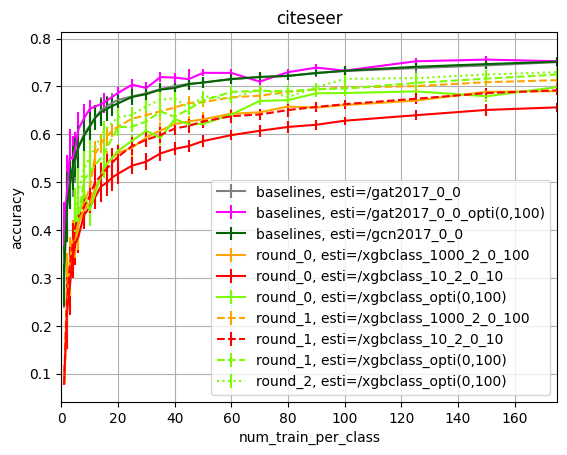

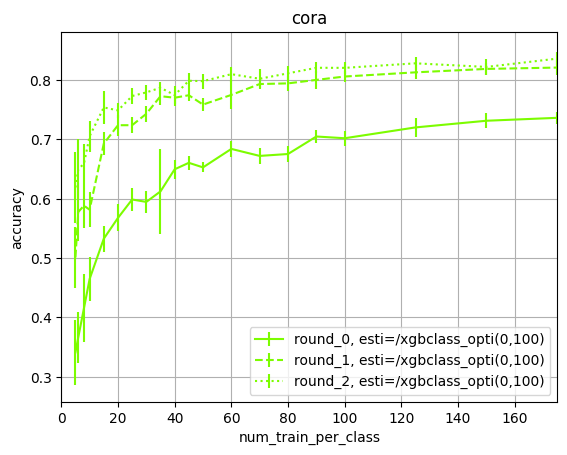

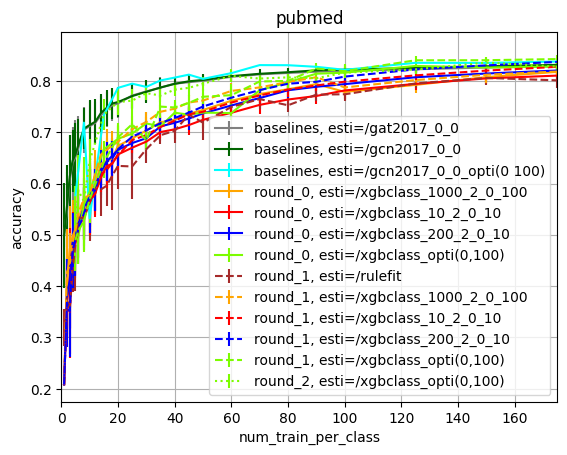

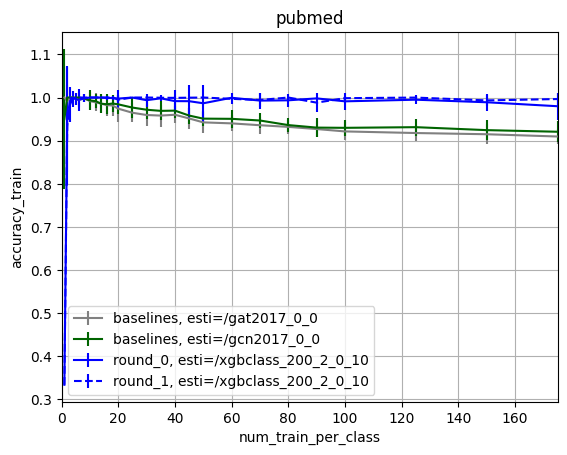

In [33]:
my_plot(df_agg, "value", x_lim=(0,175))

# Possible things to do

- use training-labels to generate features
- centralities as training features
- use random projections plus simple classifiers 
- use a different simple classifier (multi layer neural net)?